In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_excel(r'C:\Users\rahul\Downloads\Technocolab Assignment\Credit Card Default Prediction\Project Data Set\default_of_credit_card_clients.xls')

# Verifying Basic Data Integrity

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

In [7]:
df['ID'].nunique()

29687

In [8]:
id_counts = df['ID'].value_counts()
id_counts.head()

a9d910f4-fe9a    2
0a5048ae-e120    2
8567249b-827e    2
ff619017-560f    2
73baf2c4-6e90    2
Name: ID, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Boolean masks

In [10]:
np.random.seed(seed=24)


In [11]:
random_integers = np.random.randint(low=1,high=5,size=100)


In [12]:
is_equal_to_3 = random_integers == 3


In [13]:
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [14]:
sum(is_equal_to_3)


22

In [15]:
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Continuing Verification of Data Integrity

In [16]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

a9d910f4-fe9a    True
0a5048ae-e120    True
8567249b-827e    True
ff619017-560f    True
73baf2c4-6e90    True
Name: ID, dtype: bool

In [17]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [18]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4402,0a5048ae-e120,270000,1,1,2,48,Not available,0,0,0,...,26872,23660,12053,2680,1420,15,42,2476,0,0
4502,0a5048ae-e120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10491,8567249b-827e,500000,1,1,2,38,0,0,0,0,...,411820,422671,394599,21000,22800,15200,19000,16000,10000,0
10591,8567249b-827e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28250,a9d910f4-fe9a,140000,2,2,1,34,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
28350,a9d910f4-fe9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_zero_mask = df == 0


In [20]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)


315

In [21]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [22]:
df_clean_1['ID'].nunique()


29685

# Exploring and Cleaning the Data

In [23]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [24]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [26]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [27]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [28]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


In [29]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


# Exploring the Credit Limit and Demographic Features

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09769DA00>,
      dtype=object)

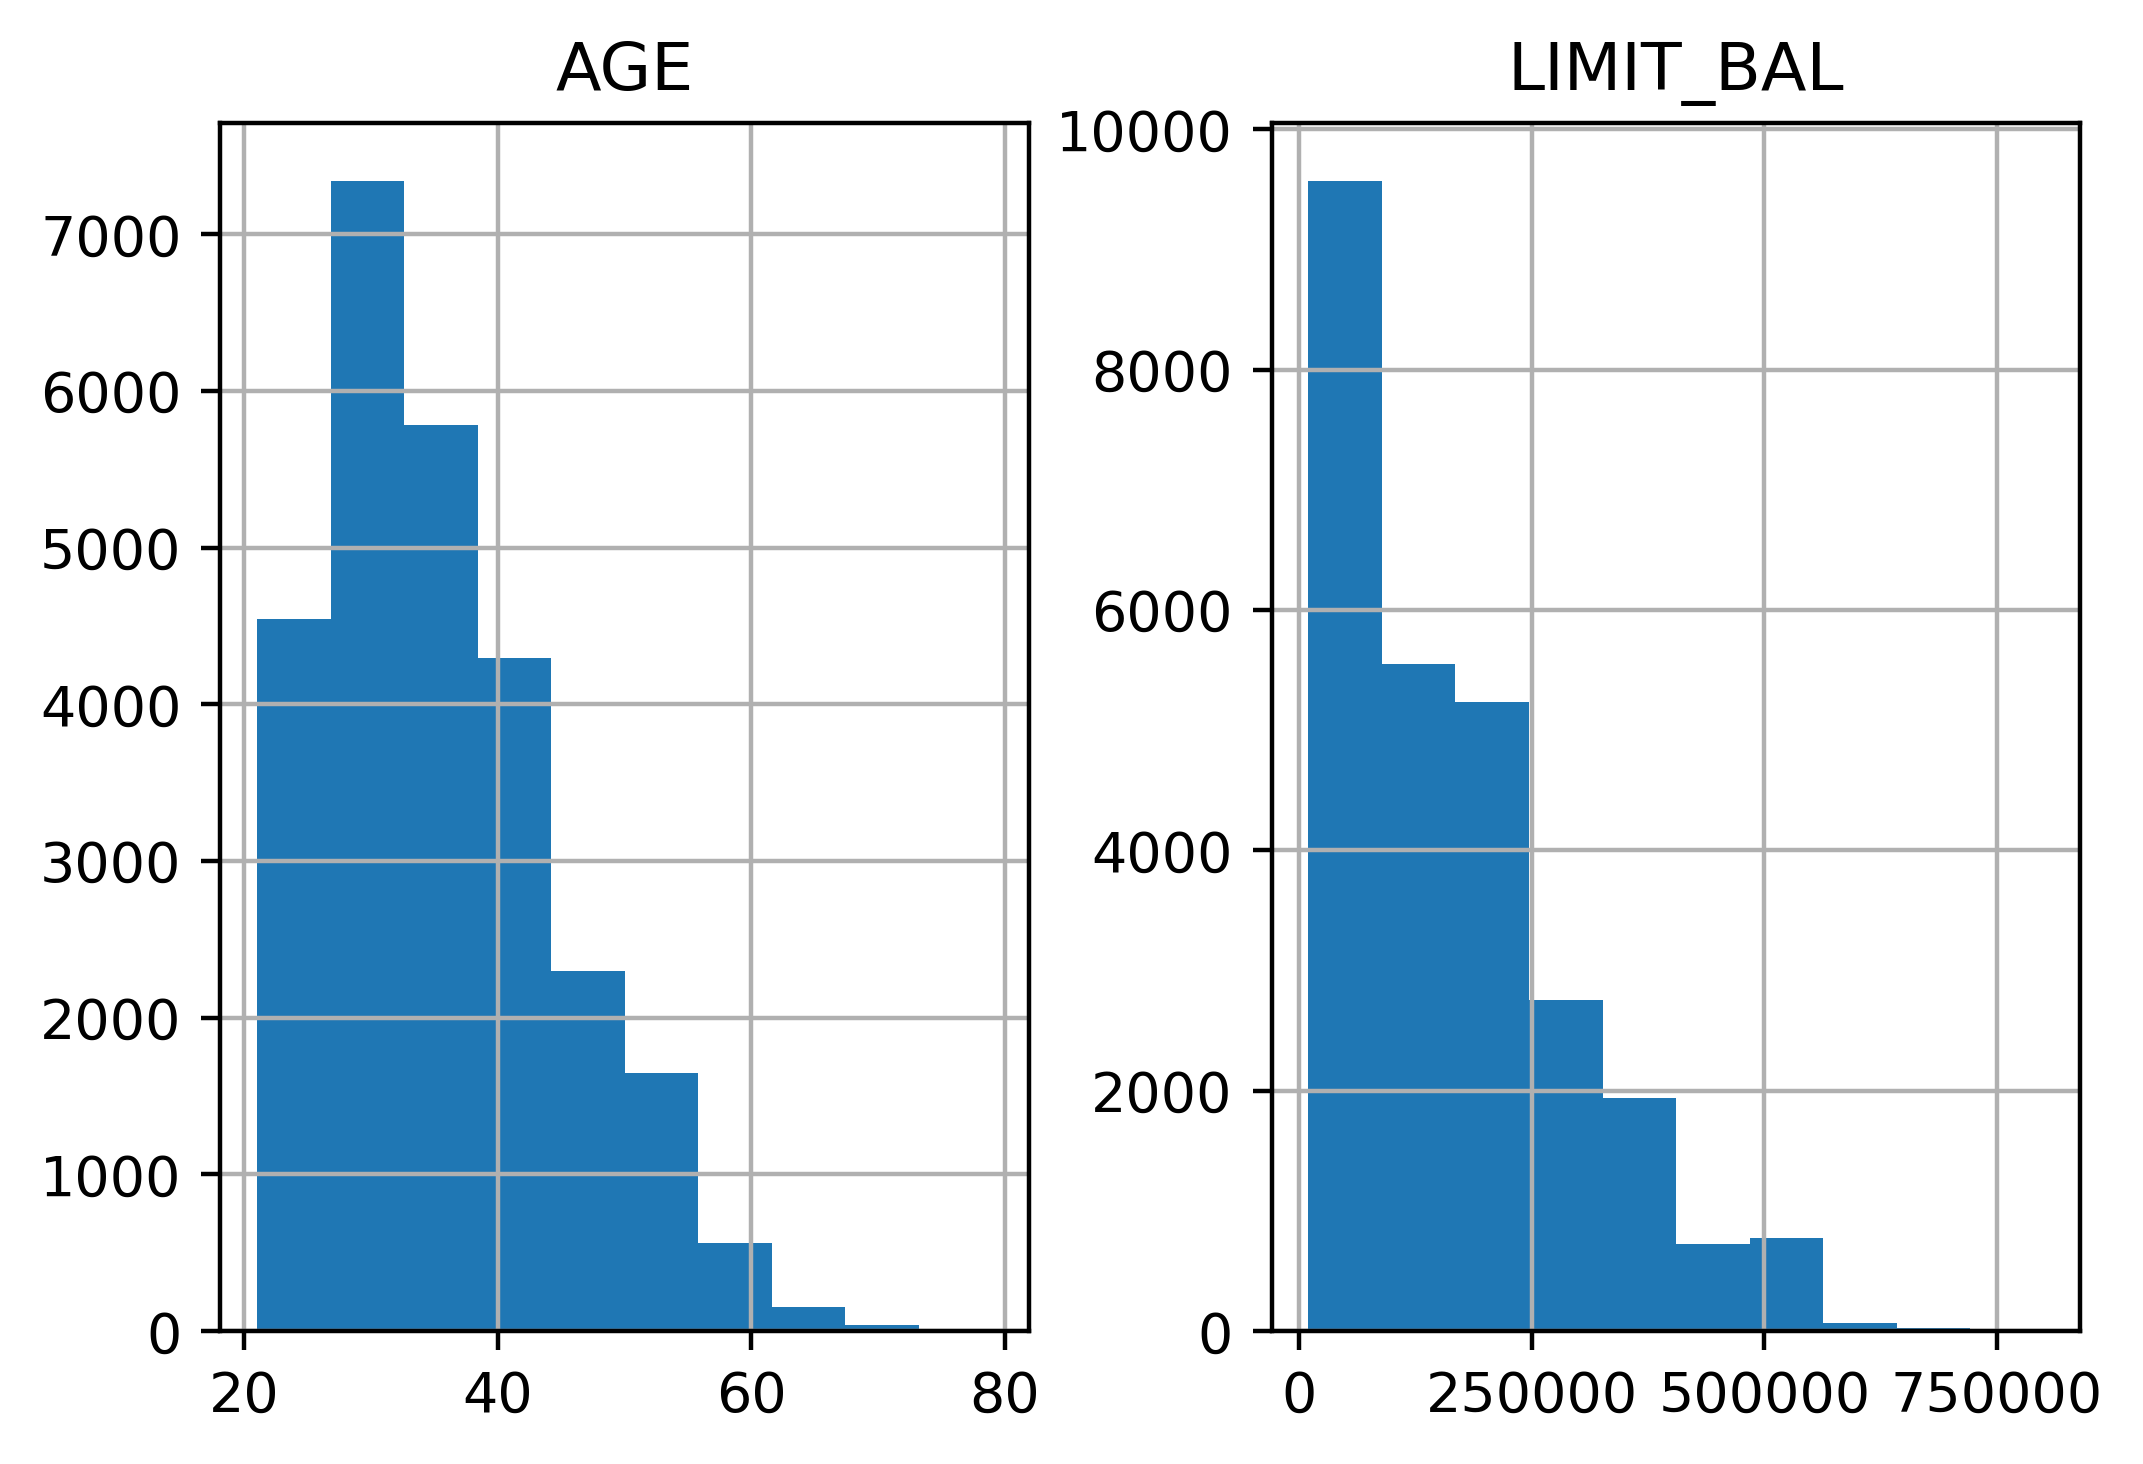

In [31]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [32]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [33]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [34]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Categorical features

In [35]:
from scipy import stats


In [36]:
z = np.array(range(1,11))

In [37]:
z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [38]:
np.random.seed(seed=24)
Y = 2*z + np.random.normal(0, 1, 10)

In [39]:
slope_line, intercept_line, r_value, p_value, std_err = stats.linregress(z,Y)

([<matplotlib.axis.YTick at 0x1e09a75a460>,
 <a list of 5 Text major ticklabel objects>)

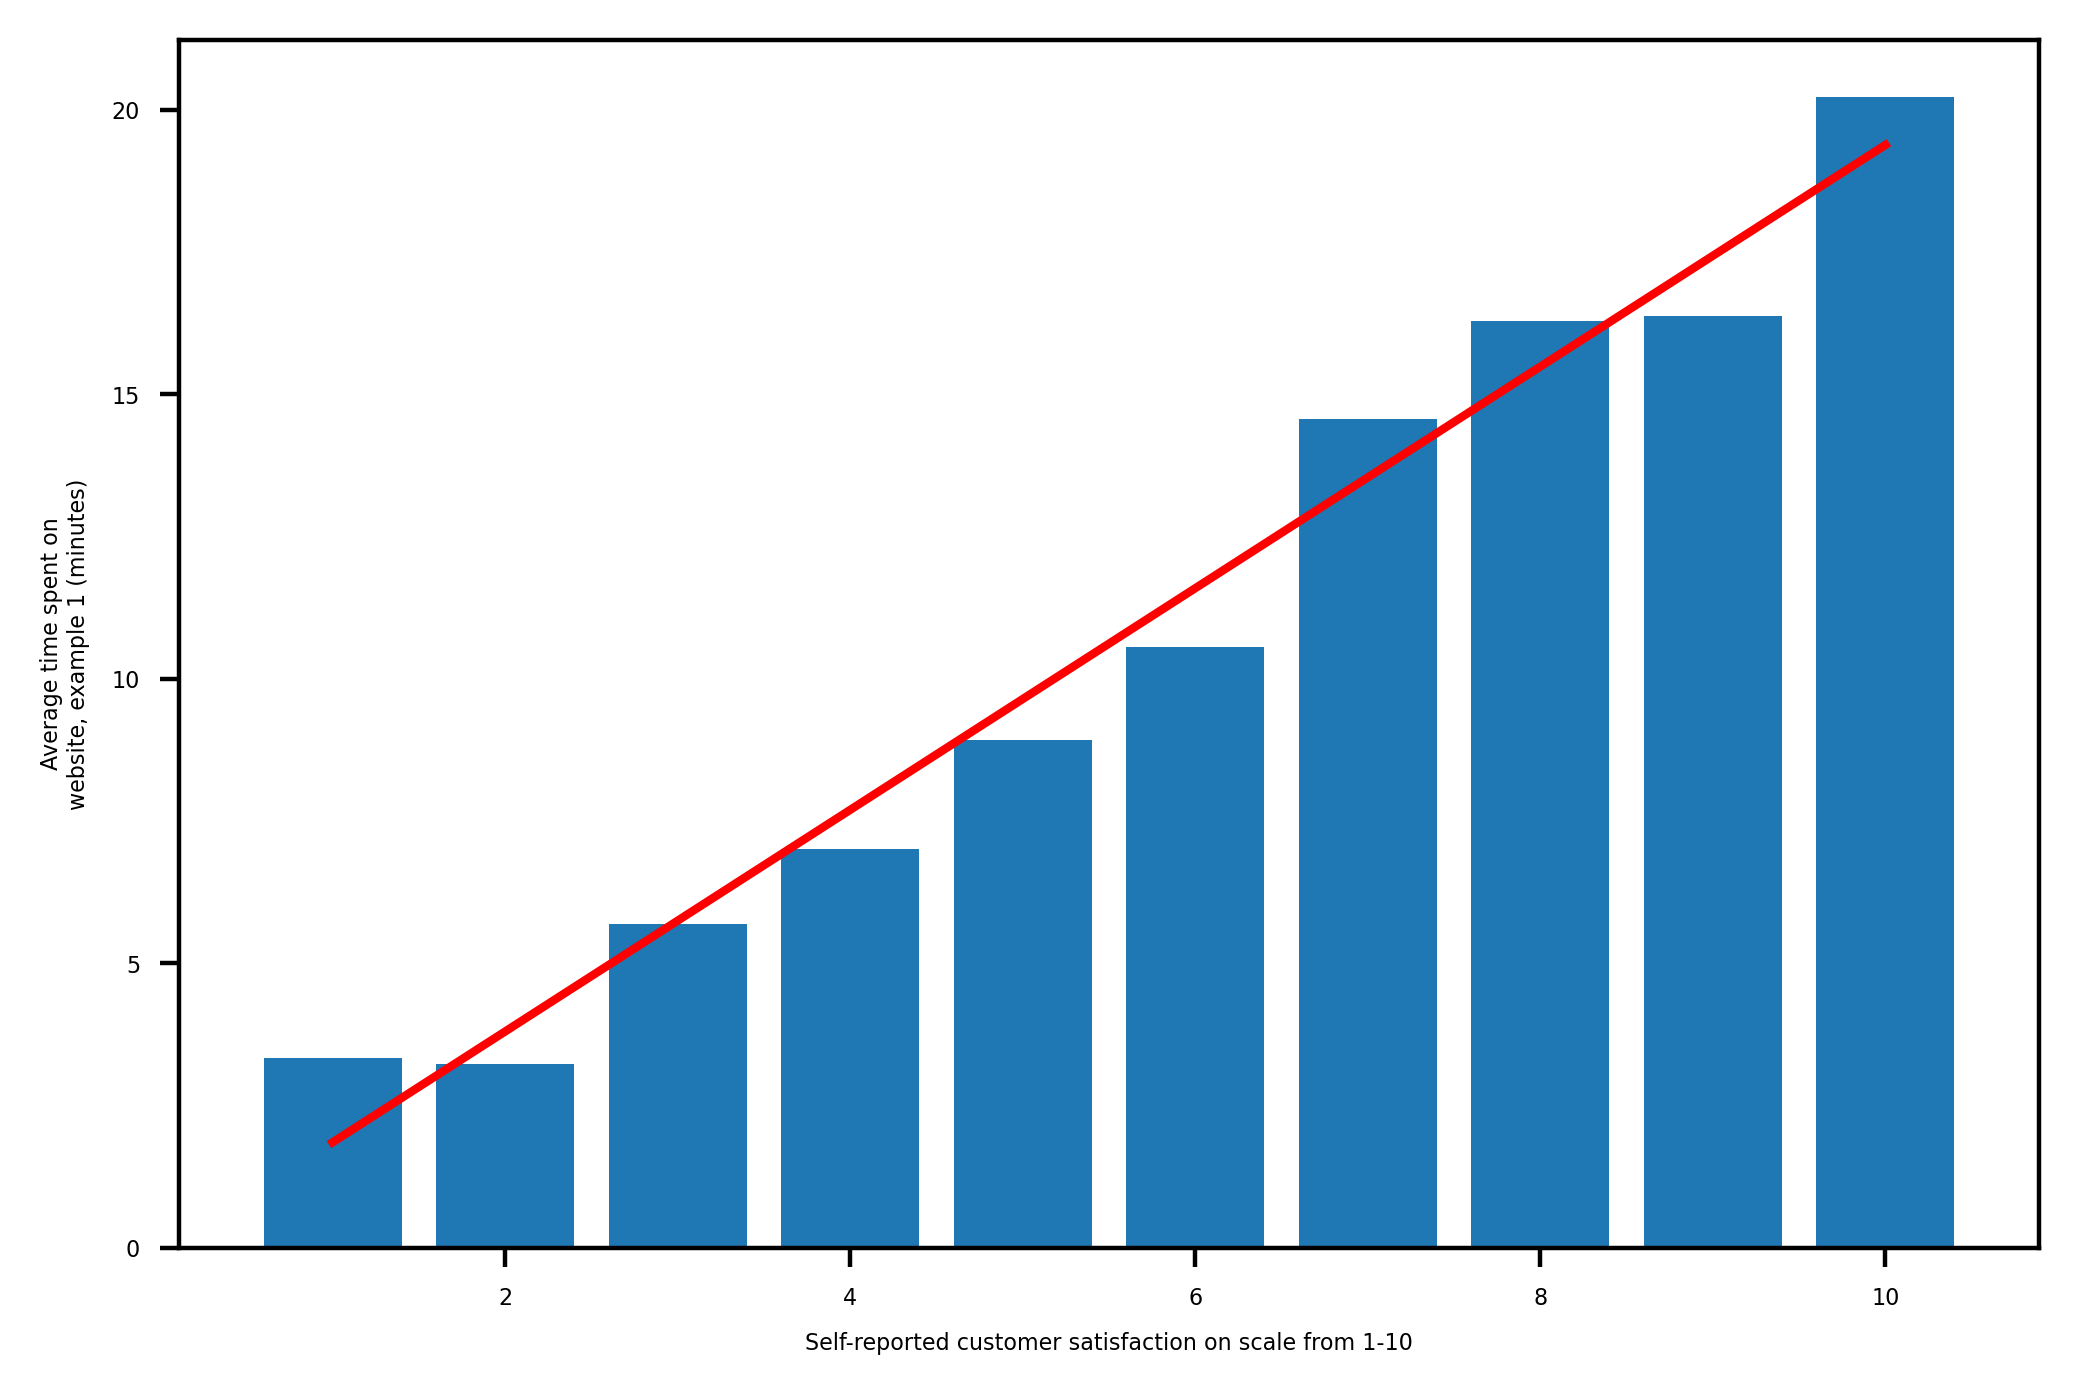

In [40]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4
plt.plot(z, intercept_line + slope_line*z, 'r-')
plt.bar(z,Y, align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 1 (minutes)')
plt.yticks(range(0,25,5))

In [41]:
np.random.seed(seed=20)
noise = np.random.normal(0, 1, 10)
Y_poly = -1*(z-2)*(z-9) + 10 + noise

In [42]:
slope_poly, intercept_poly, r_value, p_value, std_err = stats.linregress(z,Y_poly)

Text(0, 0.5, 'Average time spent on\nwebsite, example 2 (minutes)')

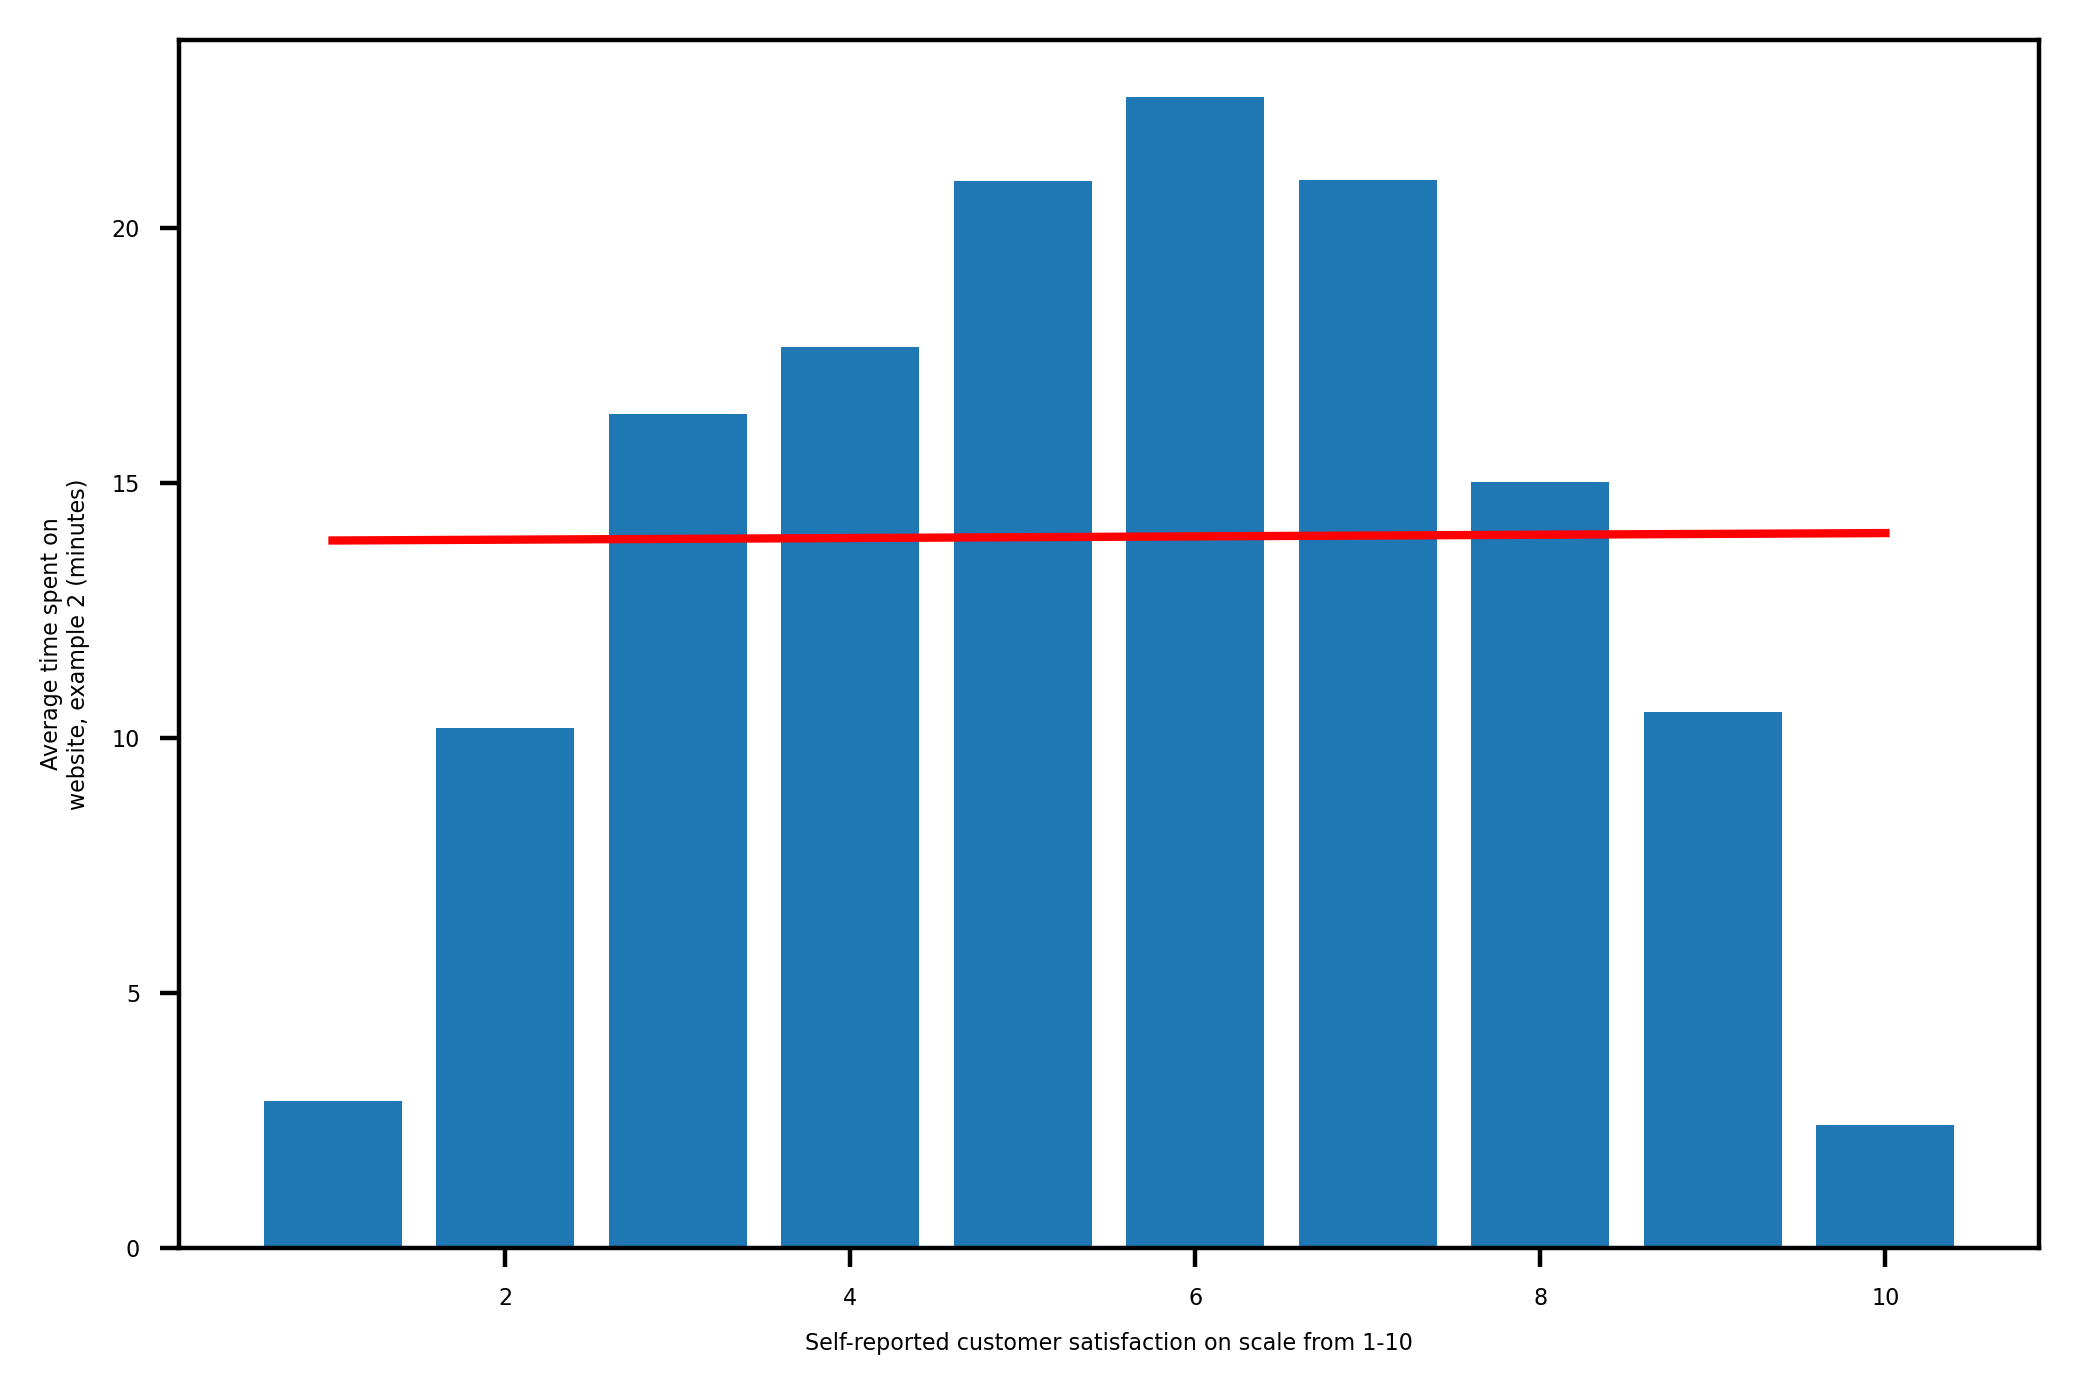

In [43]:
plt.plot(z, intercept_poly + slope_poly*z, 'r-')
plt.bar(z,Y_poly,align='center')
plt.xlabel('Self-reported customer satisfaction on scale from 1-10')
plt.ylabel('Average time spent on\nwebsite, example 2 (minutes)')

In [44]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Education level: ordinal encoding')

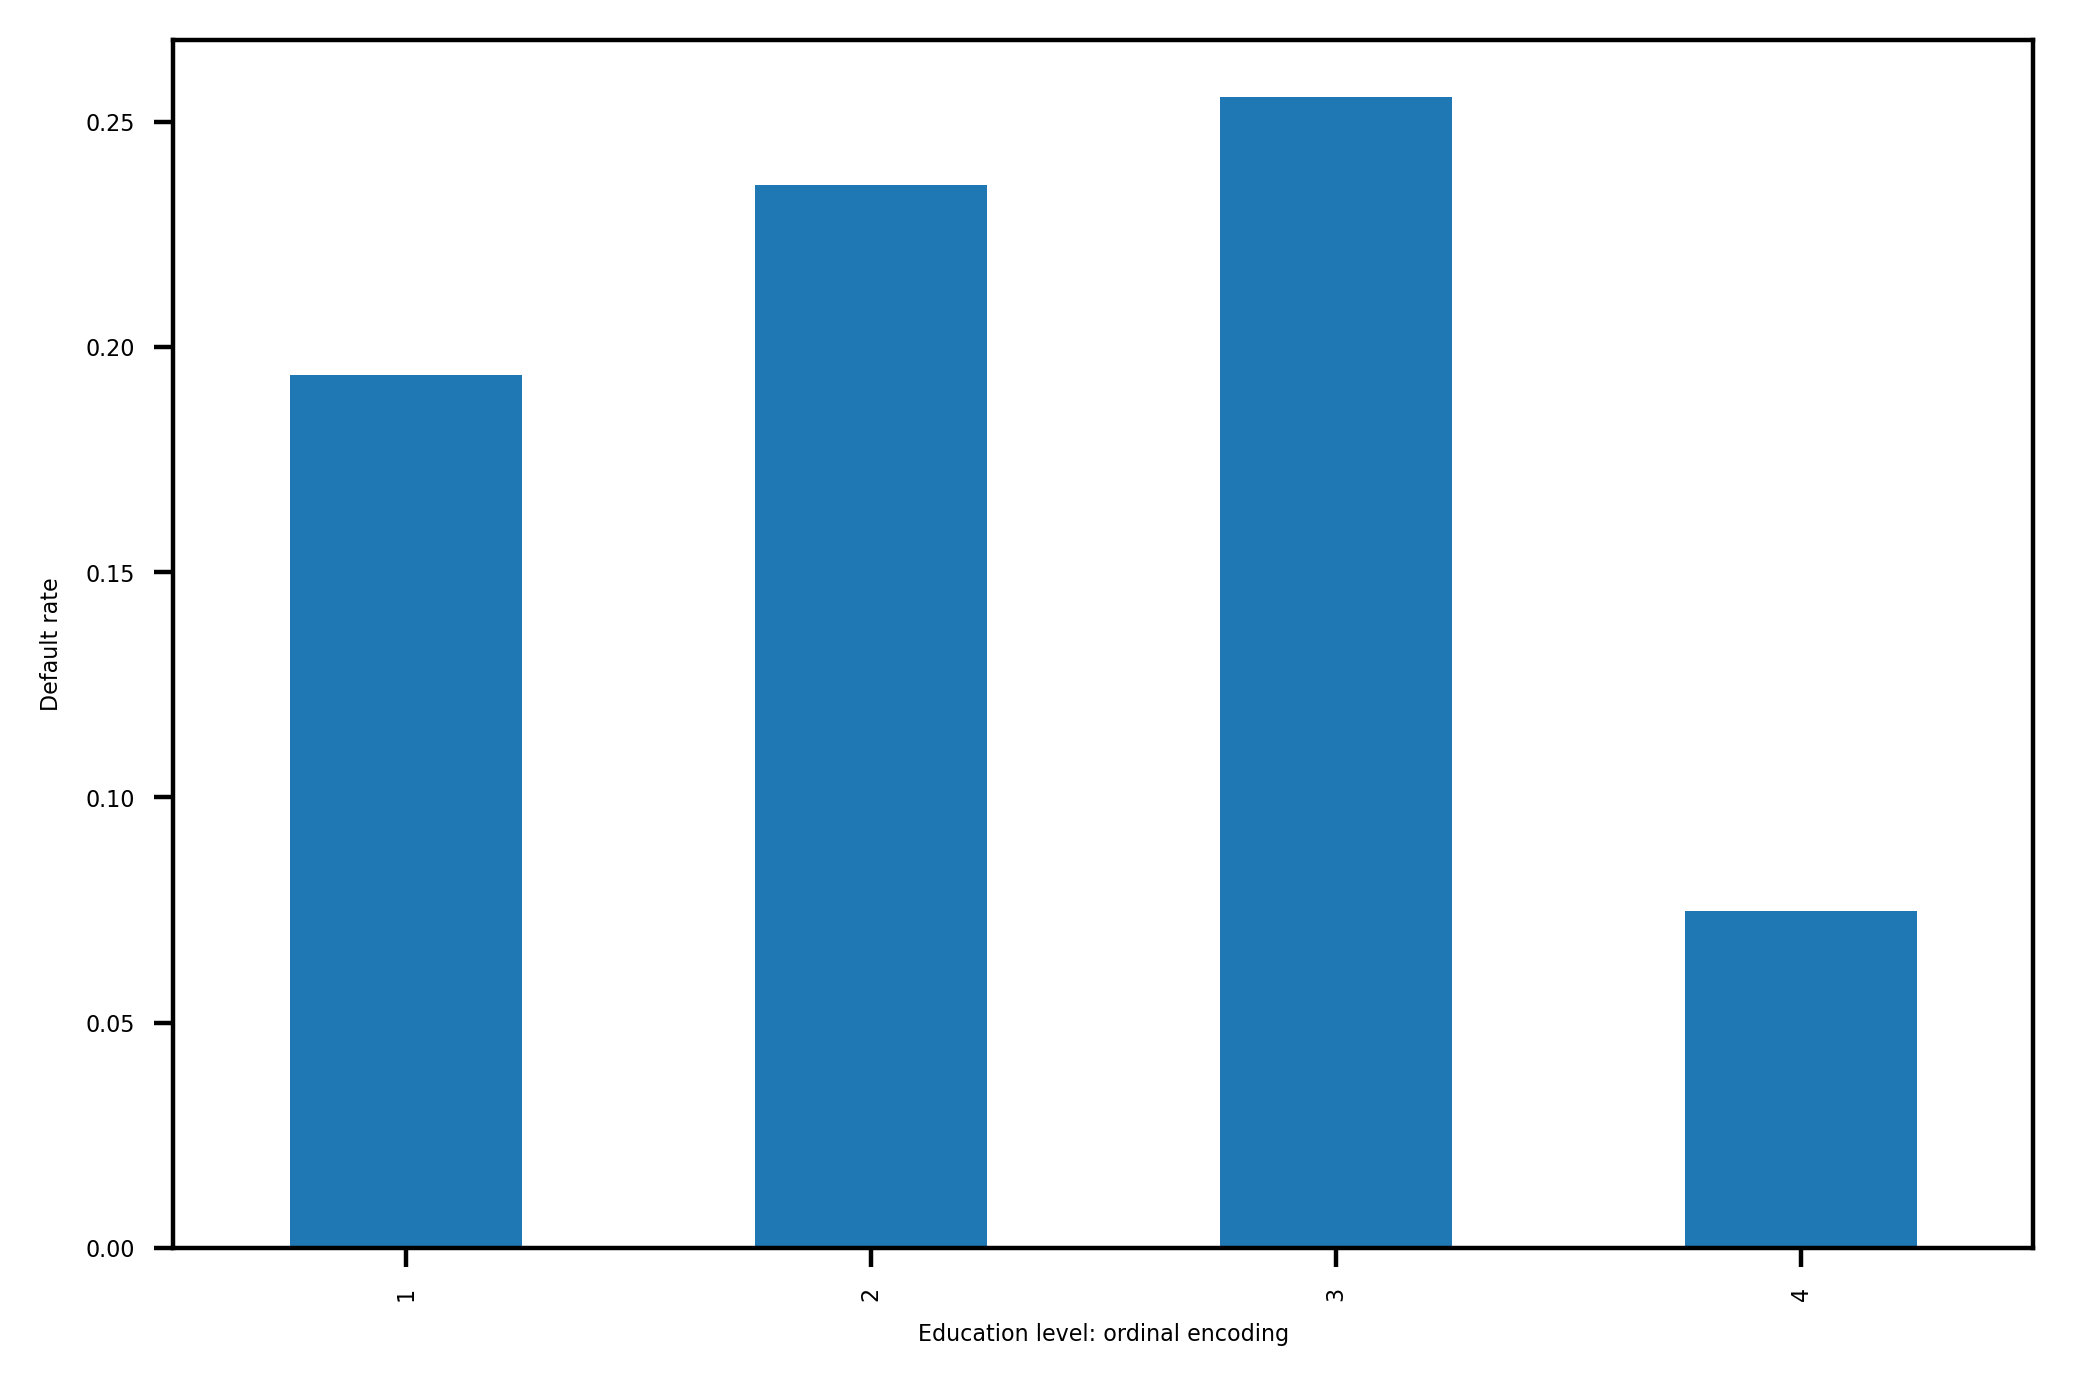

In [45]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

# Implementing One-Hot Encoding for a Categorical Feature

In [46]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [47]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [48]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [49]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [50]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)
df_with_ohe.to_csv('cleaned_data.csv', index=False)


# Exploring the Financial History Features in the Dataset

In [52]:
df = pd.read_csv(r'C:\Users\rahul\Downloads\Technocolab Assignment\Credit Card Default Prediction\cleaned_data.csv')

In [53]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [54]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [55]:
df.shape

(26664, 30)

In [56]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [57]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [58]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [59]:
pay_feats[0]

'PAY_1'

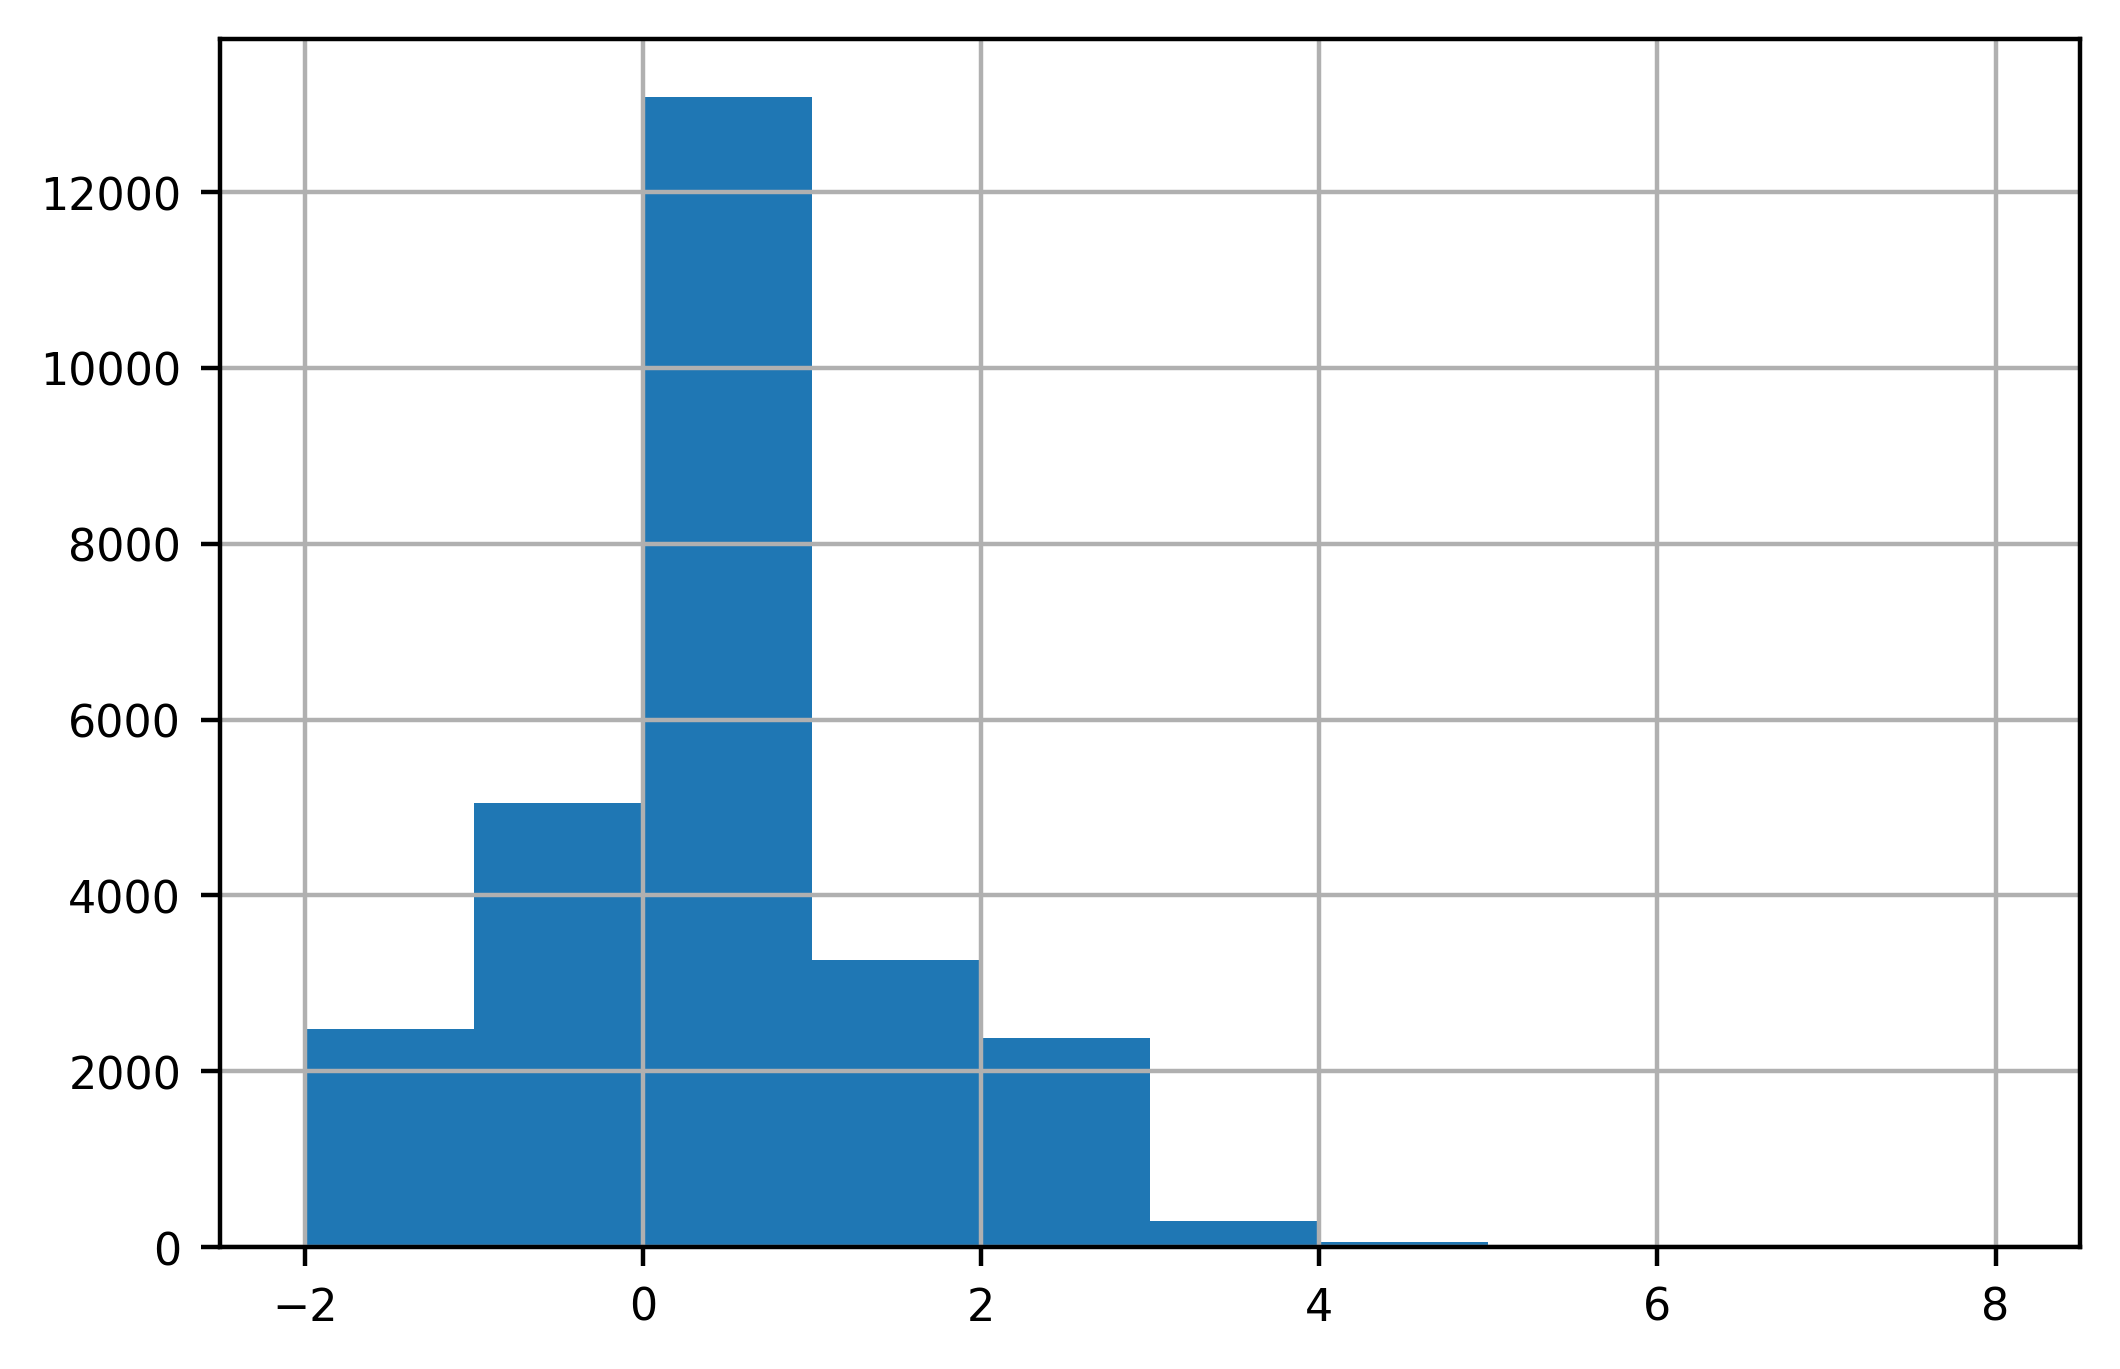

In [60]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 8
df[pay_feats[0]].hist()

In [61]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

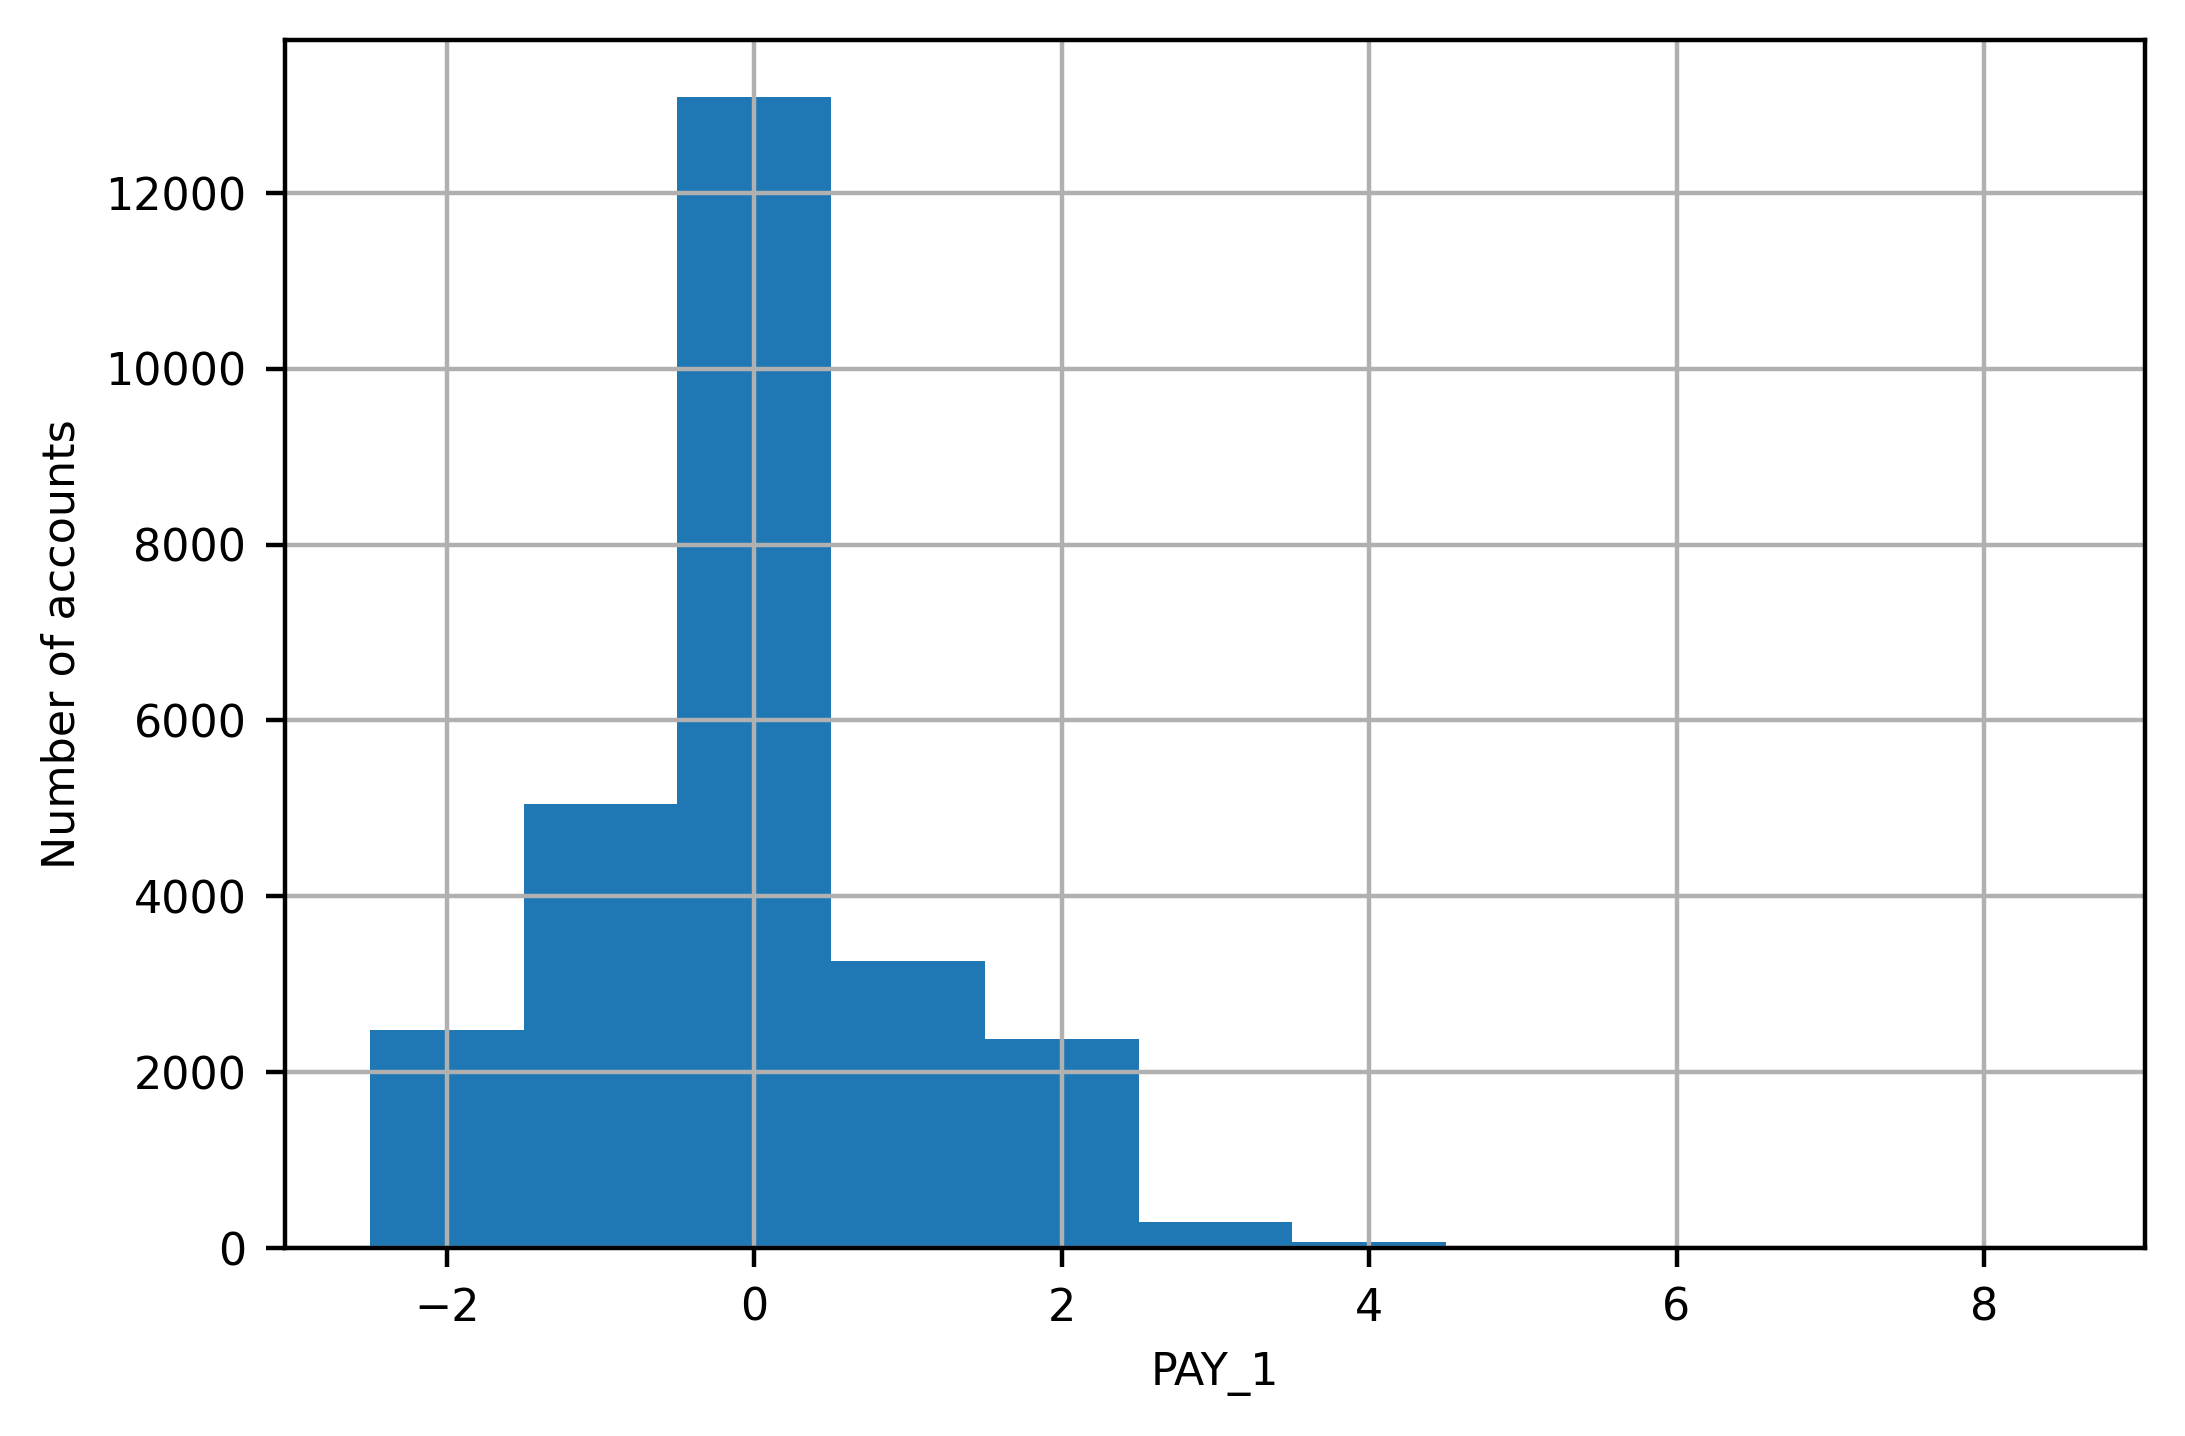

In [62]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

In [63]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09BA937F0>,
      dtype=object)

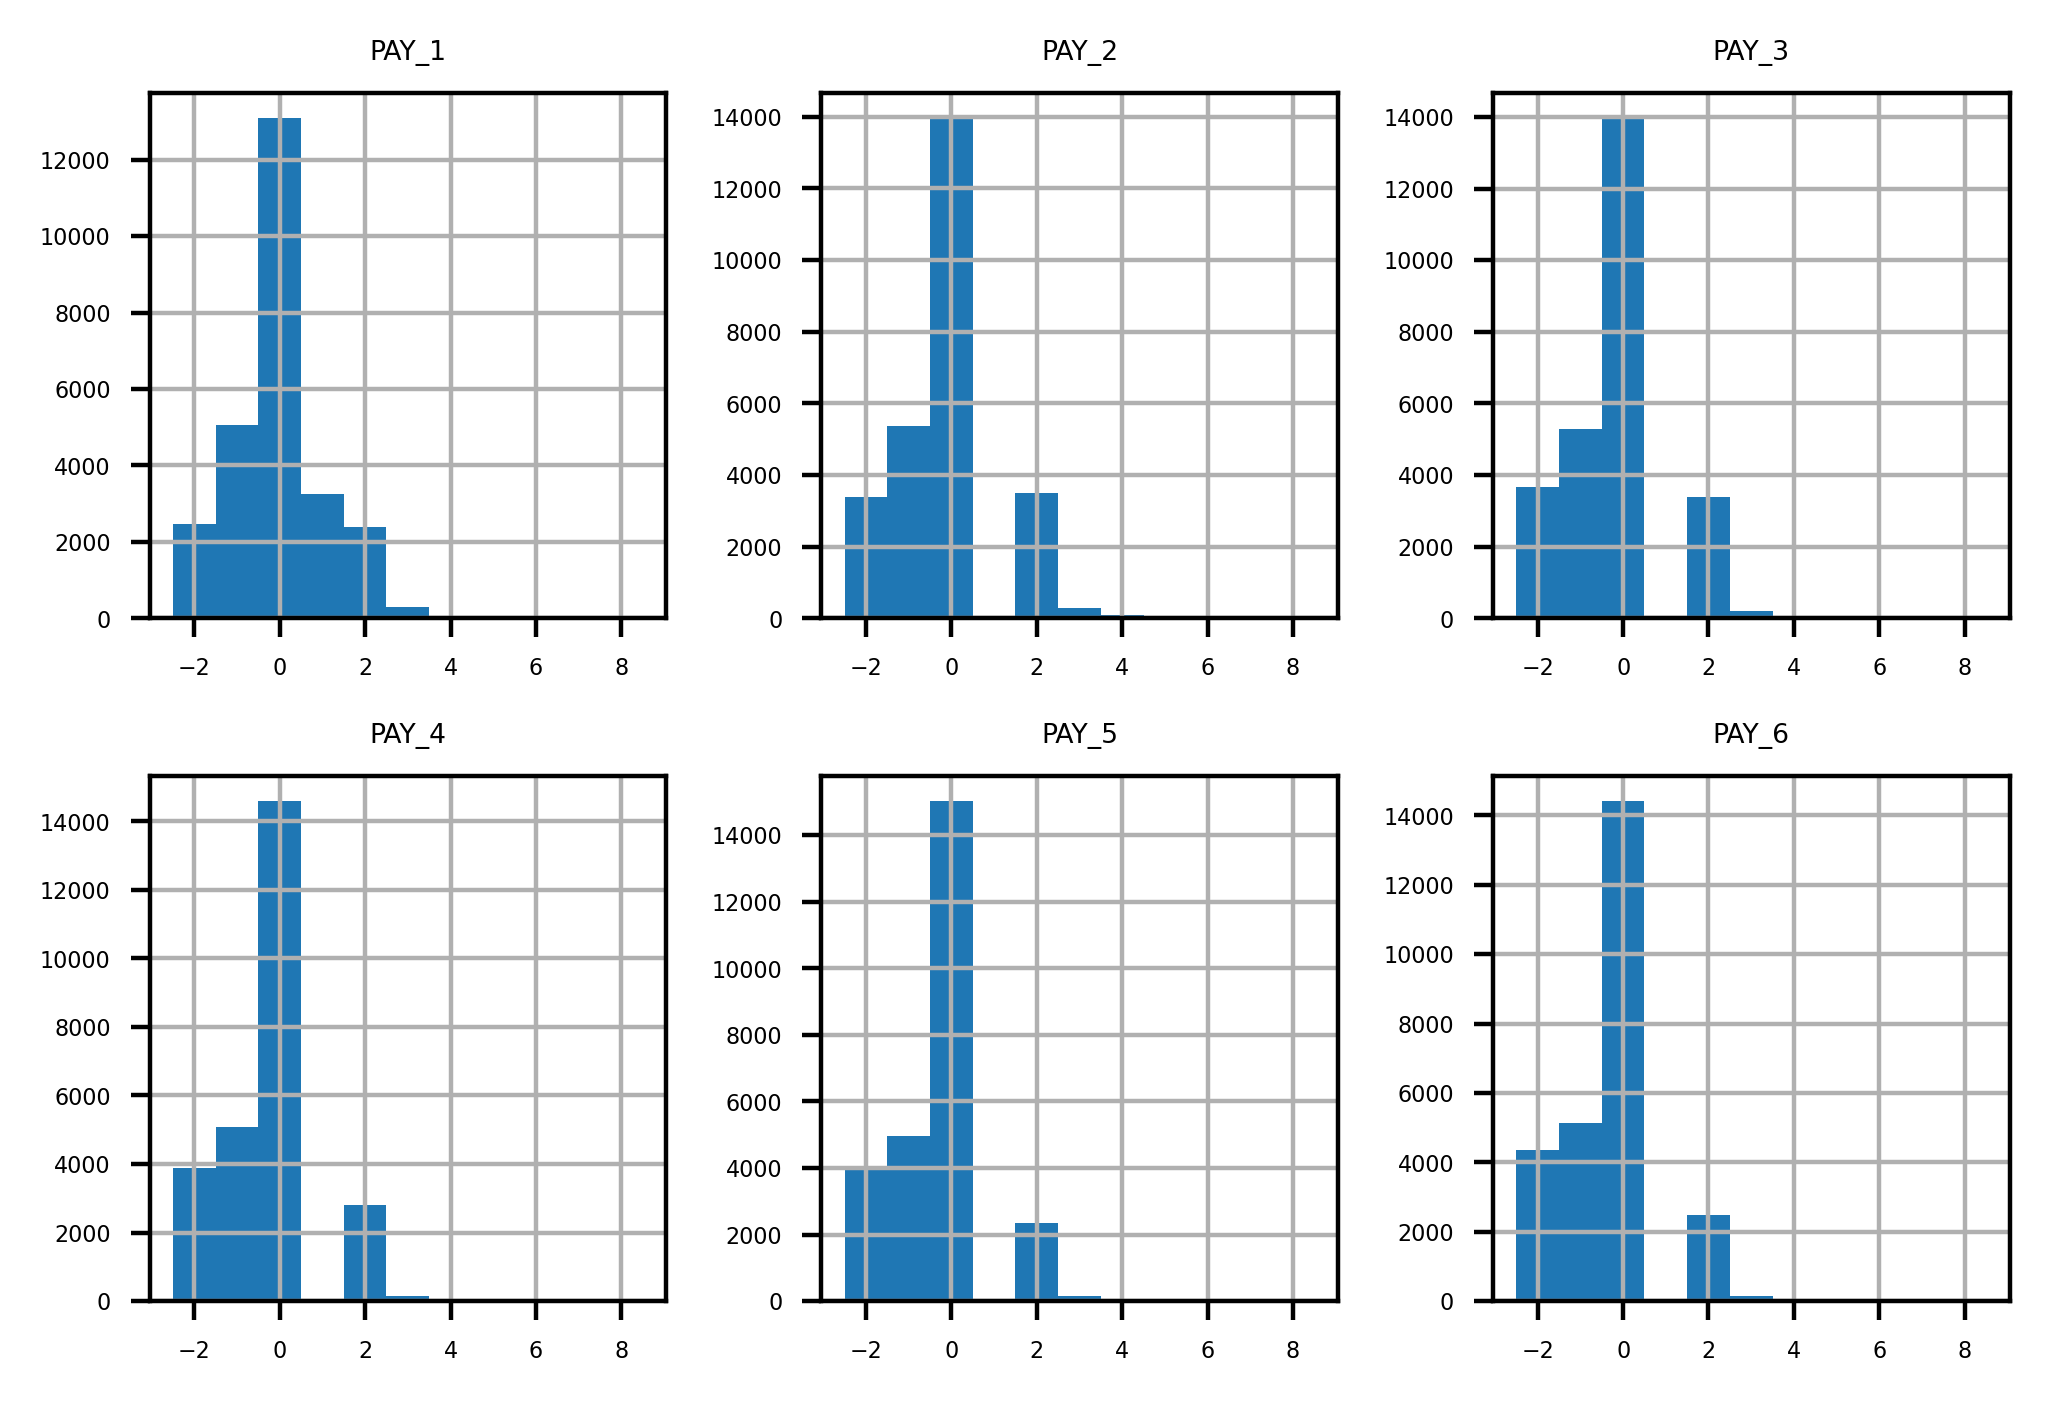

In [64]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [65]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
